In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import show
import struct
from complete_nn import NeuralNetwork

In [10]:
with open("./data/t10k-labels-idx1-ubyte", 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    ytest = np.fromfile(flbl, dtype=np.int8)
    
with open("./data/t10k-images-idx3-ubyte" , 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    xtest = np.fromfile(fimg, dtype=np.uint8).reshape(len(ytest),-1)

with open("./data/train-labels-idx1-ubyte", 'rb') as flbl:
    magic, num = struct.unpack(">II", flbl.read(8))
    ytrain = np.fromfile(flbl, dtype=np.int8)
    
with open("./data/train-images-idx3-ubyte" , 'rb') as fimg:
    magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
    xtrain = np.fromfile(fimg, dtype=np.uint8).reshape(len(ytrain),-1)

In [11]:
print("xtrain",xtrain.shape)
print("xtest",xtest.shape)
print("ytrain",ytrain.shape)
print("ytest",ytest.shape)

xtrain = xtrain.astype(np.float32)
xtest = xtest.astype(np.float32)
ytrain = ytrain.astype(np.float32)
ytest = ytest.astype(np.float32)

xtrain/=255
xtest/=255



xtrain (60000, 784)
xtest (10000, 784)
ytrain (60000,)
ytest (10000,)


In [12]:
# seed taken to compare the models with same initialization
np.random.seed(42)

def one_hot(idx):
    a = np.zeros(10)
    np.put(a,idx,1)
    return a

In [13]:
ytrainOnehot = [] 
for val in ytrain:
    ytrainOnehot.append(one_hot(val))

ytrain = np.array(ytrainOnehot)

In [14]:
ytestOnehot = [] 
for val in ytest:
    ytestOnehot.append(one_hot(val))

ytest = np.array(ytestOnehot)

In [7]:
x = {"train": xtrain,
       "test": xtest, }

y = {"train": ytrain,
       "test": ytest, }

# exp1

In [16]:
from complete_nn import NeuralNetwork

nn = NeuralNetwork(x,y,num_layers=4,eta=0.0004,num_nodes=[5,5,5,5],max_iters=500,batch_size=100)

# [300,200,100,50] ep: 178, train_acc: 0.9566666666666667, test_acc: 0.9352,train_loss: 0.49541677856592786, test_loss: 0.8889734955337
nn.train()

ep: 0, train_acc: 0.10273333333333333, test_acc: 0.1048,train_loss: 3.119220179795512, test_loss: 3.119206780498013
ep: 1, train_acc: 0.12308333333333334, test_acc: 0.1262,train_loss: 2.637647967150959, test_loss: 2.638811748326355
ep: 2, train_acc: 0.13953333333333334, test_acc: 0.1404,train_loss: 2.485628659580165, test_loss: 2.4872717059999165
ep: 3, train_acc: 0.15026666666666666, test_acc: 0.1498,train_loss: 2.405994149357598, test_loss: 2.4075347676786927
ep: 4, train_acc: 0.15733333333333333, test_acc: 0.1586,train_loss: 2.353091576684442, test_loss: 2.35459773391437
ep: 5, train_acc: 0.16386666666666666, test_acc: 0.1651,train_loss: 2.3136465138155375, test_loss: 2.3150941501955837
ep: 6, train_acc: 0.16986666666666667, test_acc: 0.1696,train_loss: 2.2819315174816457, test_loss: 2.2833434107786577
ep: 7, train_acc: 0.1749, test_acc: 0.1741,train_loss: 2.2550366973036127, test_loss: 2.2564346833410123
ep: 8, train_acc: 0.18008333333333335, test_acc: 0.1761,train_loss: 2.23127292

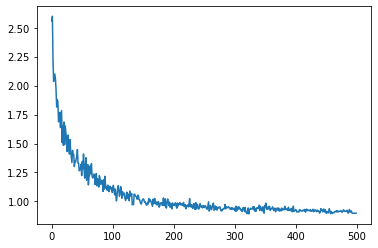

In [10]:
plt.plot(nn.loss["test"])

## above Test loss

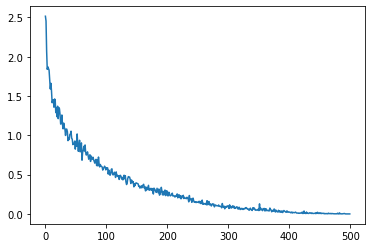

In [11]:
plt.plot(nn.loss["train"])

## above Train loss

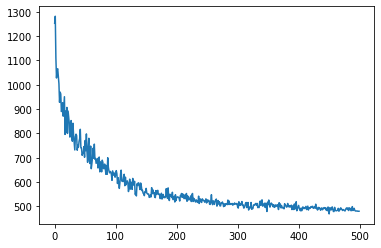

In [12]:
plt.plot(nn.misclassification["test"])

## above missclassification test

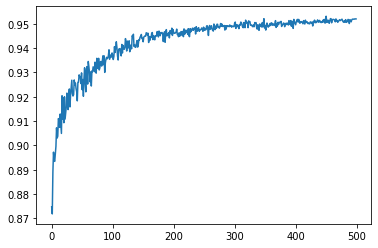

In [13]:
plt.plot(nn.accuracy["test"])

## above accuracy test

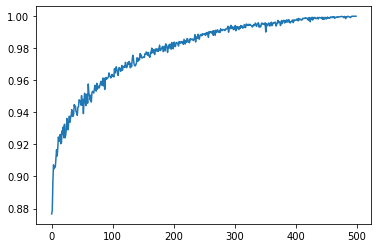

In [14]:
plt.plot(nn.accuracy["train"])

# above accuracy train